# Travail pratique 2
*INF600F - Traitement d'images (H2022, UQÀM)*

In [4]:
# Importation des modules pertinents ici. 
# Assurez-vous d'inclure toute autre fonction que vous
# jugez nécessaires ici

import numpy as np
import imageio
import matplotlib.pyplot as plt
import scipy.ndimage

# Exercice 1 : Filtrage spatial (9 pts)

# Partie 1

In [5]:
def imgPad(f, r, c, padType='zeros', loc='both'):
    """Ajoute un padding à une image
    
    Parameters
    ----------
    f : ndarray
        Image à modifier
    r : int
        Taille du padding pour les lignes
    c : int
        Taille du padding pour les colonnes
    padType : str
        Type de padding. Valeurs possibles : 'zeros', 'replicate'
    loc : str
        Position du padding. Valeurs possibles : 'both' ou 'post'
    Returns
    -------
    f_p : ndarray
        Image avec un padding ajouté
    """
    if(loc == 'post'):
        newDim = (f.shape[0]+r, f.shape[1]+c) 

    else : newDim = (f.shape[0]+2*r, f.shape[1]+2*c) 
    
    f_p = np.zeros(newDim)

    if(padType == 'replicate') :

        if(loc == 'both'):
            f_p[0 : r, c : newDim[1] - c] += f[f.shape[0]-r : f.shape[0]] #haut
            f_p[r : f_p.shape[0]-r, 0 : c] += f[0 : f.shape[0], f.shape[1]-c : f.shape[1]] #guauche

            f_p[0 : r, 0 : c] += f[f.shape[0]-r : f.shape[0], f.shape[1]-c : f.shape[1]] #haut guauche
            f_p[f_p.shape[0]-r : f_p.shape[0], 0 : c] += f[0 : r, f.shape[1]-c : f.shape[1]] #bas guauche
            f_p[0 : r, f_p.shape[1]-c : f_p.shape[1]] += f[f.shape[0]-r : f.shape[0], 0 : c] # haut droite

            f_p[f_p.shape[0]-r : f_p.shape[0], c : newDim[1] - c] += f[0 : r] #bas
            f_p[r : f_p.shape[0]-r, f_p.shape[1]-c : f_p.shape[1]] += f[0 : f.shape[0], 0 : c] #droite

            f_p[f_p.shape[0]-r : f_p.shape[0], f_p.shape[1]-c : f_p.shape[1]] += f[0 : r, 0 : c] #bas droite
        
        else :
            f_p[f_p.shape[0]-r : f_p.shape[0], 0 : f_p.shape[1] - c] += f[0 : r] #bas
            f_p[0 : f_p.shape[0]-r, f_p.shape[1]-c : f_p.shape[1]] += f[0 : f.shape[0], 0 : c] #droite

            f_p[f_p.shape[0]-r : f_p.shape[0], f_p.shape[1]-c : f_p.shape[1]] += f[0 : r, 0 : c] #bas droite

    if(padType == 'zeros' or padType == 'replicate'):
        if(loc == 'post'):
            f_p[0 : newDim[0] - r, 0 : newDim[1] - c] += f

        else : f_p[r : newDim[0] - r, c : newDim[1] - c] += f
        
    return f_p
        
    

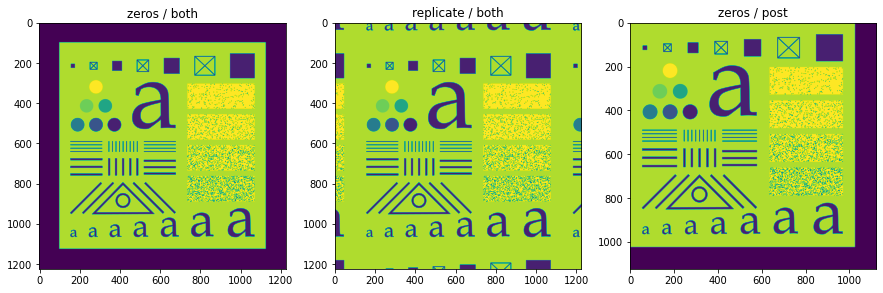

In [25]:
img1 = imageio.imread("tp2_ex3.tif")

plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title("zeros / both")
plt.imshow(imgPad(img1, 100, 100))

plt.subplot(132)
plt.title("replicate / both")
plt.imshow(imgPad(img1, 100, 100, 'replicate'))

plt.subplot(133)
plt.title("zeros / post")
plt.imshow(imgPad(img1, 100, 100, 'zeros','post'))

plt.show()

# Partie 2

In [8]:
def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm
    return matrix

In [9]:
def twodConv(f, w, normalize=True):
    """ Effectue une convolution 2D de l'image f avec le noyau w

    Parameters
    ----------
    f : ndarray
        Image convoluer
    w : ndarray
        Noyau/filtre pour la convolution
    normalize : bool
        Si True, les intensités de l'image f doivent être normalisées entre 0 et 1
    Returns
    -------
    f_p : ndarray
        Image convoluée
    Notes
    -----
    * La fonction imgPad créée dans la partie précédente doit être utilisée.
    """
    # Votre code ici
    newImage = scipy.ndimage.convolve(imgPad(f, 1, 1), w)
    f_p = newImage[1 : f.shape[0]+1, 1 : f.shape[1]+1]
    if(normalize):
        f_p = normalize_2d(f_p)
    return f_p

# Partie 3

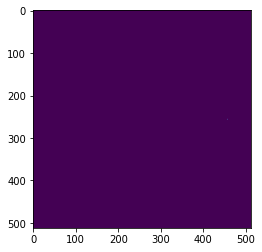

In [19]:
kernel = np.array([
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0]
])
img1 = imageio.imread("tp2_ex3.tif")

img = np.zeros((512,512))
img[256,256] += 255

for i in range(0, 100):
    img = twodConv(img, kernel)

plt.imshow(img)
plt.show()


J'ai répété 100 fois la fonction twodConv sur l'image pour pouvoir notifier le résultat sur le rendu. 

# Exercice 2 : Transformée de Fourier (6 pts)

In [17]:
def display_fft(img_fft):
    """Affichage de l'amplitude et de la phase d'une transformée de Fourier
    
    Parameters
    ----------
    img_fft : ndarray
        Transformée de Fourier d'une image
    """

    img = imageio.imread(img_fft)
    imgfft = np.fft.fft2(img) # transformée de fourier

    imgfft_shift = np.fft.fftshift(imgfft) # placer la fréquence nulle au centre / inverser les axes
    amp = np.abs(imgfft_shift)
    phase = np.angle(imgfft_shift)

    plt.figure(figsize=(10,10))
    plt.subplot(121);plt.imshow(np.log(amp + 1e-6), cmap='gray');plt.title('Amplitude') #Amplitude

    plt.show() 

<Figure size 360x360 with 0 Axes>

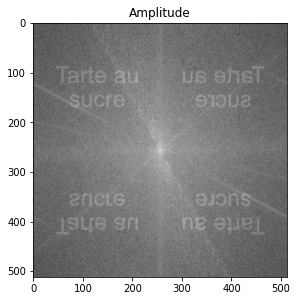

In [18]:
img = imageio.imread('tp2_ex2.tif')
plt.figure(figsize=(5,5)) # Taille de la figure

display_fft('tp2_ex2.tif')

<u> Trouver le message codé secret caché dans le domaine fréquentiel de l'image. </u>

Réponse : Tarte au sucre


<u>Expliquez comment le message a été crypté dans l'image et pourquoi il n'était pas visible dans l'image originale.</u>

Réponse : Le message n'est pas visible dans l'image originale, car il est visible seulement dans la transformation de fourier avec l'amplitude et la transformation logarithmique. Il a été crypté dans l'amplitude avec la transformation logarithmique, puis remis dans l'image originale pour être caché.

# Exercice 3 : Filtrage fréquentiel (10 pts)

# Partie 1

In [1]:
def filtreButterworth(u, v, P, Q, D0, n):
    Duv = distance(u, v, P, Q, D0)
    Huv = 1/(1+((Duv/D0)**2*n))
    return Huv

def filtreGaussien(u, v, P, Q, D0) : 
    Duv = distance(u, v, P, Q, D0)
    Huv = np.exp(-(Duv**2/(2*(D0**2))))
    return Huv

def filtreIdeal(u, v, P, Q, D0):
    Duv = distance(u, v, P, Q, D0)
    return Duv <= D0

def distance(u, v, P, Q, D0):
    Duv = (((u - P/2)**2) + ((v - Q/2)**2))**0.5
    return Duv

In [2]:
def lpFilterTF(type, P, Q, param):
    """Crée un filtre passe bas fréquentiel
    
    Parameters
    ----------
    type : str
        Type de filtre. Valeurs possibles : 'ideal', 'gaussian', 'butterworth'
    P : int
        Nombre de ligne du filtre
    Q : int
        Nombre de colonne du filtre
    param : float ou list
        Si type='ideal' ou type='gaussian', param=d0
        Si type='butterworth', type=[d0,n]

    Returns
    -------
    H : ndarray
        Filtre fréquentiel passe bas de taille PxQ
    
    """
    if (type == 'ideal' or type == 'gaussian'):
        D0 = param  
    elif(type == 'butterworth'):
        D0 = param[0]
        n = param[1]

    H = np.zeros((P,Q))

    for u in range(0, P):
        for v in range(0, Q):
            
            if(type == 'ideal'):
                H[u,v] = filtreIdeal(u, v, P, Q, D0)
            elif(type == 'gaussian'):
                H[u,v] = filtreGaussien(u, v, P, Q, D0)
            elif(type == 'butterworth'):
                H[u, v] = filtreButterworth(u, v, P, Q, D0, n)

    return H

# Partie 2

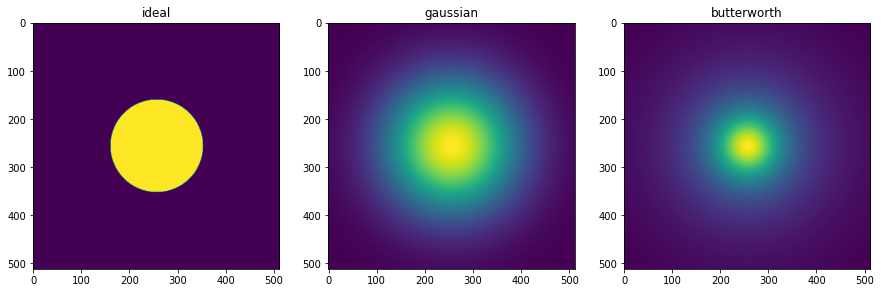

In [15]:
ideal = lpFilterTF('ideal', 512, 512, 96)
gaussian = lpFilterTF('gaussian', 512, 512, 96)
butterworth = lpFilterTF('butterworth', 512, 512, (96,2))

plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title("ideal")
plt.imshow(ideal)

plt.subplot(132)
plt.title("gaussian")
plt.imshow(gaussian)

plt.subplot(133)
plt.title("butterworth")
plt.imshow(butterworth)


# Partie 3

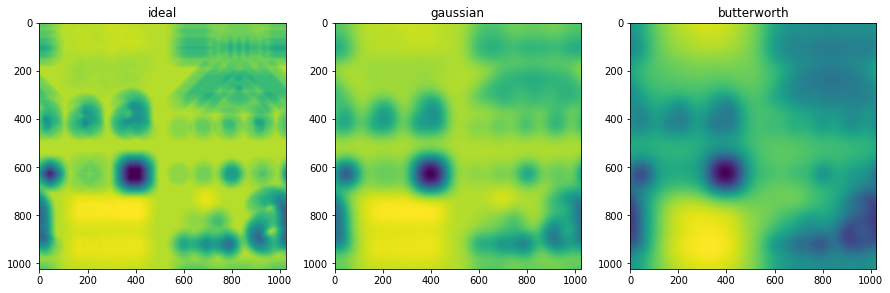

In [14]:
ideal = lpFilterTF('ideal', 1024, 1024, 45)
gaussian = lpFilterTF('gaussian', 1024, 1024, 35)
butterworth = lpFilterTF('butterworth', 1024, 1024, (65,2))

img = imageio.imread("tp2_ex3.tif")

fft_size = (1024,1024)

img_fft = np.fft.fft2(img, fft_size)

filtre_ideal = np.fft.fft2(ideal, fft_size)
res_ideal = filtre_ideal*img_fft

filtre_gaussian = np.fft.fft2(gaussian, fft_size)
res_gaussian = filtre_gaussian*img_fft

filtre_butterworth = np.fft.fft2(butterworth, fft_size)
res_butterworth = filtre_butterworth*img_fft

plt.figure(figsize=(15,15))

plt.subplot(131)
plt.title("ideal")
plt.imshow(np.fft.ifft2(res_ideal).real)

plt.subplot(132)
plt.title("gaussian")
plt.imshow(np.fft.ifft2(res_gaussian).real)

plt.subplot(133)
plt.title("butterworth")
plt.imshow(np.fft.ifft2(res_butterworth).real)